In [1]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm
import itertools
import time
from prophet import Prophet
from xgboost import plot_importance
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV


# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [3]:
data = pd.read_csv('finaldataall.csv', parse_dates=[0])
data

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,2023-02-25,CO,2023,8,22.0,17340235.0,501900.0,6060640.0,10749595.0,28100.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7302,2023-02-25,MI,2023,8,69.0,28917130.0,967600.0,11182320.0,16740610.0,26600.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7303,2023-02-25,MD,2023,8,45.0,21829280.0,616400.0,7305760.0,13876420.0,30700.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7304,2023-02-25,LA,2023,8,24.0,10141420.0,330300.0,4094680.0,5707940.0,8500.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521


In [4]:
data = data.drop(['location', 'date.1'], axis = 1)

In [5]:
data.fillna(0, inplace = True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)  

In [6]:
data

,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,distributed_unk_manuf,dist_per_100k,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2020-01-04,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-25,2023,8,22.0,17340235.0,501900.0,6060640.0,10749595.0,28100.0,0.0,301112.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
2023-02-25,2023,8,69.0,28917130.0,967600.0,11182320.0,16740610.0,26600.0,0.0,289552.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
2023-02-25,2023,8,45.0,21829280.0,616400.0,7305760.0,13876420.0,30700.0,0.0,361072.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521


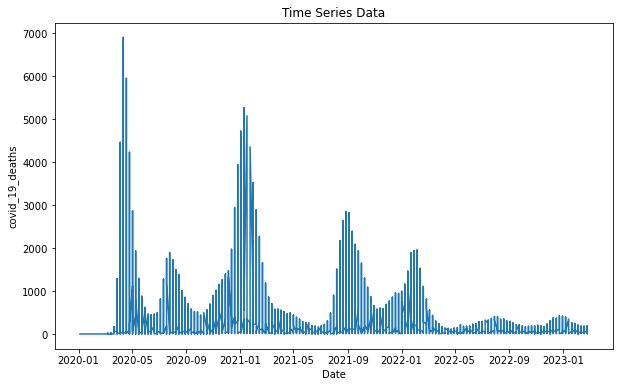

Mean: 152.28811935395566
Variance: 96433.29890605855
ADF Test p-value: 0.0014460960716783033


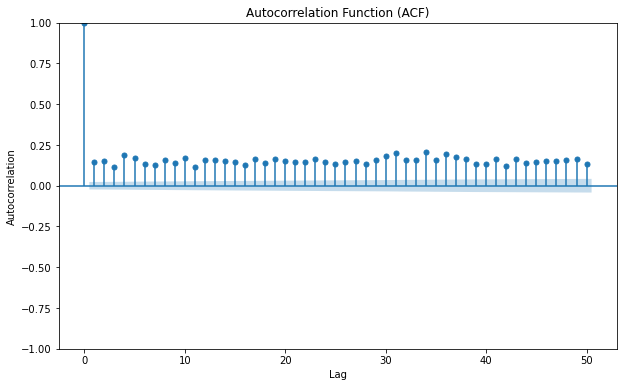

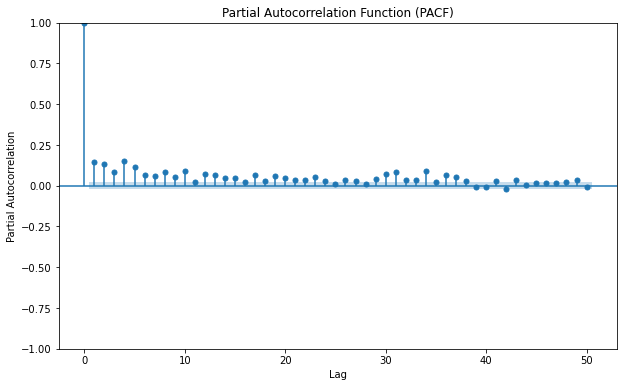

In [7]:
ts = data['covid_19_deaths']

# 1. Visual Inspection
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('covid_19_deaths')
plt.show()

# 2. Summary Statistics
print("Mean:", ts.mean())
print("Variance:", ts.var())

# 3. Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(ts)
print("ADF Test p-value:", adf_result[1])

# 5. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(ts, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [8]:
# Compute correlation between features and target
correlation_matrix = data.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['covid_19_deaths']

# Print out the correlations
print(correlation_with_target)

year                  -0.077633
mmwr_week              0.021036
covid_19_deaths        1.000000
distributed            0.132591
distributed_janssen    0.158470
                         ...   
holidays_Normal_day    0.026625
month_sin              0.011471
month_cos              0.123950
dayofweek_sin               NaN
dayofweek_cos               NaN
Name: covid_19_deaths, Length: 143, dtype: float64


# Prophet Multivariate

In [9]:
# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index)

train_end_date = '2023-01-01'

# Convert train_end_date to datetime object if it's in string format
train_end_date = pd.to_datetime(train_end_date)


# Split the data into training and testing sets based on train_end_date
train = data[data.index < train_end_date]
test = data[data.index >= train_end_date]

# Verify the shapes of the training and testing sets
print(train.shape, test.shape)

(6974, 143) (332, 143)


In [10]:
def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = 1 / (n - 1) * np.sum(np.abs(Predicted[1:] - Actual[:-1]))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

# baseline model 

13:13:25 - cmdstanpy - INFO - Chain [1] start processing
13:13:27 - cmdstanpy - INFO - Chain [1] done processing


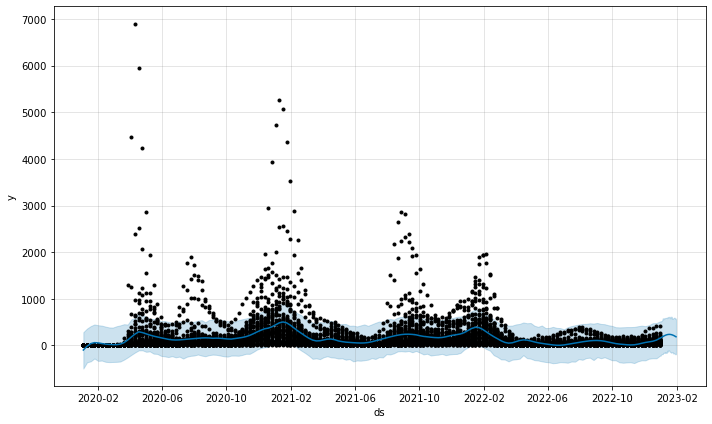

In [11]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()

# Fit the model on the training dataset
model_baseline.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

# 30 day forecase
future_baseline = model_baseline.make_future_dataframe(periods=30)

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

In [12]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True, n_changepoints = 2)

# Fit the model on the training dataset
model_season.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

13:13:28 - cmdstanpy - INFO - Chain [1] start processing
13:13:28 - cmdstanpy - INFO - Chain [1] done processing


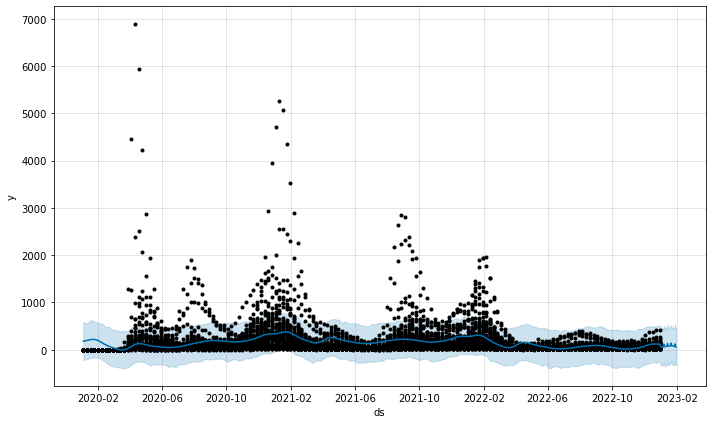

In [13]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=30)

# Make prediction
forecast_season = model_season.predict(future_season)

# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

In [14]:
# Merge actual and predicted values
performance_season = pd.merge(test.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}), forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-30:], on='ds')

# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')

The MAE for the seasonality model is 77.81456026192987


In [15]:
# Add holidays
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, n_changepoints = 3)

# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')

# Fit the model on the training dataset
model_holiday.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

# All the holidays and events
model_holiday.train_holiday_names

13:13:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:30 - cmdstanpy - INFO - Chain [1] done processing


0                                      New Year's Day
1                                        Memorial Day
2                                    Independence Day
3                         Independence Day (observed)
4                                           Labor Day
5                                        Veterans Day
6                                        Thanksgiving
7                                       Christmas Day
8                          Martin Luther King Jr. Day
9                               Washington's Birthday
10                                       Columbus Day
11                          New Year's Day (observed)
12               Juneteenth National Independence Day
13    Juneteenth National Independence Day (observed)
14                           Christmas Day (observed)
dtype: object

13:13:34 - cmdstanpy - INFO - Chain [1] start processing
13:14:16 - cmdstanpy - INFO - Chain [1] done processing


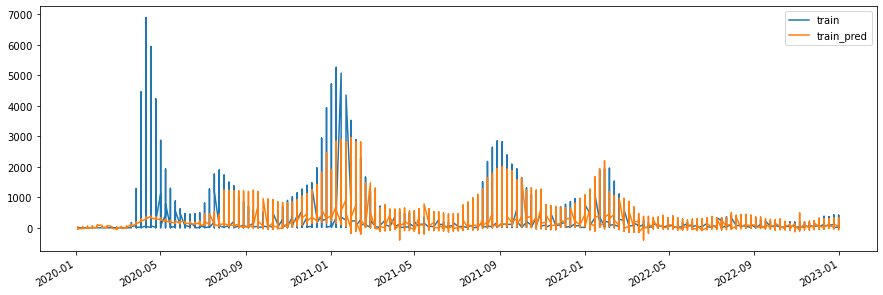

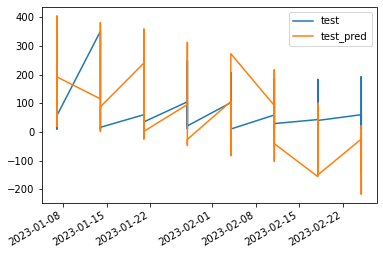

Training Set Metrics:
Training MAE: 173.25615570390914
Training MASE: 0.021717617249291117

Testing Set Metrics:
Testing MAE: 98.50597699134536
Testing MASE: 0.024141994212892978


In [16]:
model = Prophet()
for col in train.columns:
    if col not in ['date', 'covid_19_deaths']:
        model.add_regressor(col)
model=model.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

train_pred=model.predict(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')

pd.concat([train['covid_19_deaths'],train_pred['yhat']], axis=1).plot(figsize=(15,5)) 
plt.legend(['train', 'train_pred'])
plt.show()

test_pred=model.predict(test.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')
pd.concat([test['covid_19_deaths'],test_pred['yhat']], axis=1).plot( )
plt.legend(['test', 'test_pred'])
plt.show()

# Calculate metrics 

# Train

train_mae = mean_absolute_error(train['covid_19_deaths'], train_pred['yhat'])
train_mase = MASE(train['covid_19_deaths'], train_pred['yhat'])

print("Training Set Metrics:")
print("Training MAE:", train_mae)
print("Training MASE:", train_mase)

test_mae = mean_absolute_error(test['covid_19_deaths'], test_pred['yhat'])
test_mase = MASE(test['covid_19_deaths'], test_pred['yhat'])

print("\nTesting Set Metrics:")
print("Testing MAE:", test_mae)
print("Testing MASE:", test_mase)

13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:22 - cmdstanpy - INFO - Chain [1] done processing


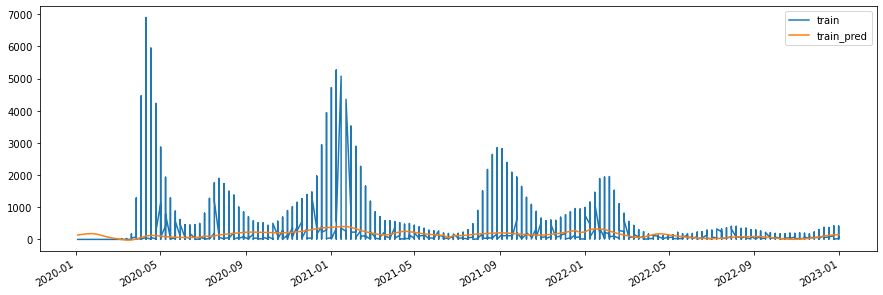

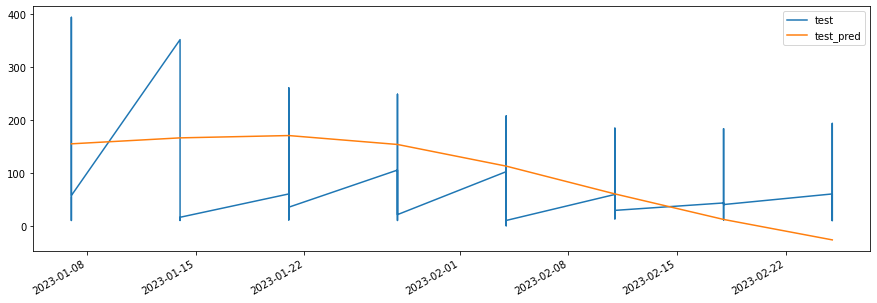

Training Set Metrics:
Training MAE: 142.7545547442509
Training MASE: 0.021508255176335127

Testing Set Metrics:
Testing MAE: 79.56183431717187
Testing MASE: 0.023828835211637416


In [17]:
# Add holidays
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, n_changepoints=3)

# Add built-in country-specific holidays
model.add_country_holidays(country_name='US')


# Fit the model to the training data
model.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

# Make predictions on the training set
train_pred = model.predict(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')

# Plot predictions vs. actuals for the training set
pd.concat([train['covid_19_deaths'], train_pred['yhat']], axis=1).plot(figsize=(15,5))
plt.legend(['train', 'train_pred'])
plt.show()

# Make predictions on the test set
test_pred = model.predict(test.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')

# Plot predictions vs. actuals for the test set
pd.concat([test['covid_19_deaths'], test_pred['yhat']], axis=1).plot(figsize=(15,5))
plt.legend(['test', 'test_pred'])
plt.show()

# Calculate metrics for the training set
train_mae = mean_absolute_error(train['covid_19_deaths'], train_pred['yhat'])
train_mase = MASE(train['covid_19_deaths'], train_pred['yhat'])

print("Training Set Metrics:")
print("Training MAE:", train_mae)
print("Training MASE:", train_mase)

# Calculate metrics for the testing set
test_mae = mean_absolute_error(test['covid_19_deaths'], test_pred['yhat'])
test_mase = MASE(test['covid_19_deaths'], test_pred['yhat'])

print("\nTesting Set Metrics:")
print("Testing MAE:", test_mae)
print("Testing MASE:", test_mase)


BEST MODEL

15:57:27 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing


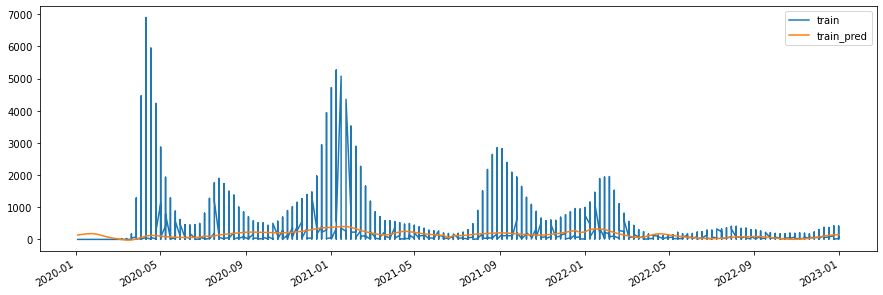

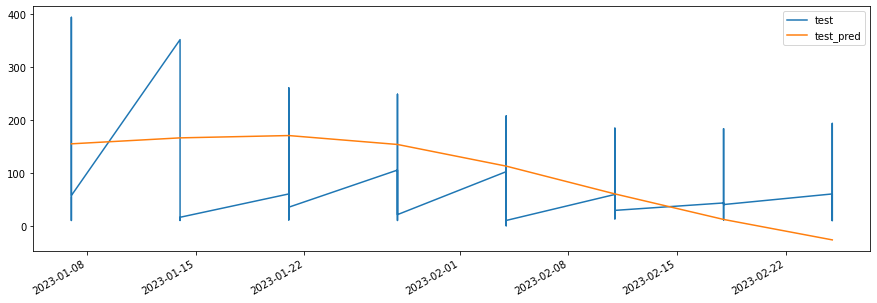

Training Set Metrics:
Training MAE: 142.7545547442509
Training MASE: 0.021508255176335127

Testing Set Metrics:
Testing MAE: 79.56183431717187
Testing MASE: 0.023828835211637416


In [19]:
# Add holidays and specify additional parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    n_changepoints=3,
    changepoint_prior_scale=0.05,  # Added changepoint prior scale 
    seasonality_prior_scale=10.0,  # Added seasonality prior scale 
)

# Add built-in country-specific holidays
model.add_country_holidays(country_name='US')

# Fit the model to the training data
model.fit(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'}))

# Make predictions on the training set
train_pred = model.predict(train.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')

# Plot predictions vs. actuals for the training set
pd.concat([train['covid_19_deaths'], train_pred['yhat']], axis=1).plot(figsize=(15,5))
plt.legend(['train', 'train_pred'])
plt.show()

# Make predictions on the test set
test_pred = model.predict(test.reset_index().rename(columns={'date':'ds', 'covid_19_deaths':'y'})).set_index('ds')

# Plot predictions vs. actuals for the test set
pd.concat([test['covid_19_deaths'], test_pred['yhat']], axis=1).plot(figsize=(15,5))
plt.legend(['test', 'test_pred'])
plt.show()

# Calculate metrics for the training set
train_mae = mean_absolute_error(train['covid_19_deaths'], train_pred['yhat'])
train_mase = MASE(train['covid_19_deaths'], train_pred['yhat'])

print("Training Set Metrics:")
print("Training MAE:", train_mae)
print("Training MASE:", train_mase)

# Calculate metrics for the testing set
test_mae = mean_absolute_error(test['covid_19_deaths'], test_pred['yhat'])
test_mase = MASE(test['covid_19_deaths'], test_pred['yhat'])

print("\nTesting Set Metrics:")
print("Testing MAE:", test_mae)
print("Testing MASE:", test_mase)
